$\newcommand{\is}{\mathrel{\mathop:=}}$
$\newcommand{\range}{\mathop{ran}}$
$\newcommand{\setof}[1]{\left \{ #1 \right \}}$
$\newcommand{\card}[1]{\left | #1 \right |}$
$\newcommand{\tuple}[1]{\left \langle #1 \right \rangle}$
$\newcommand{\emptytuple}{\left \langle \right \rangle}$
$\newcommand{\tuplecat}{\cdot}$
$\newcommand{\emptystring}{\varepsilon}$
$\newcommand{\String}[1]{\mathit{#1}}$
$\newcommand{\LeftEdgeSymbol}{\rtimes}$
$\newcommand{\RightEdgeSymbol}{\ltimes}$
$\newcommand{\LeftEdge}{\LeftEdgeSymbol}$
$\newcommand{\RightEdge}{\RightEdgeSymbol}$
$\newcommand{\mult}{\times}$
$\newcommand{\multisum}{\uplus}$
$\newcommand{\multimult}{\otimes}$
$\newcommand{\freqsymbol}{\mathrm{freq}}$
$\newcommand{\freq}[1]{\freqsymbol(#1)}$

# Bag of Words Revisited

By now you are familiar with a rudimentary version of the bag-of-words model.
I say rudimentary because, to be frank, we haven't looked at the actual bag-of-words model yet.
Our version of the bag-of-words model maps texts (formalized as strings) to sets.
But this isn't what is commonly understood as a bag-of-words model, most people would call it a "set-of-words" model.
A bag-of-words isn't supposed to jut list the word types that occur in a text, it lists the word types and the respective number of tokens.
So the true bag-of-words model maps strings to multisets.

## Keeping Track of Counts

As a reminder, here is our original definition of the bag-of-words model, now with a more appropriate name:

<div class=definition>
Let $\Sigma$ be some fixed finite set of words.
A *set-of-words* model is a function $s: \Sigma^+ \rightarrow \wp(\Sigma)$ such that for all $t \in \Sigma^+$

$$
s(t)
\is
\begin{cases}
    \setof{t} & \text{if } t \in \Sigma\\
    s(u) \cup s(v) & \text{if } t = u \tuplecat v, \text{ where } u, v \in \Sigma^+\\
\end{cases}
$$
</div>

Only a minor change is needed for a proper bag-of-words model that extracts counts for all word types.

<div class=definition>
Let $\Sigma$ be some fixed finite set of words.
A *bag-of-words* model is a function $b: \Sigma^+ \rightarrow \Sigma \times \mathbb{N}$ such that for all $t \in \Sigma^+$

$$
b(t)
\is
\begin{cases}
    \setof{t: 1} & \text{if } t \in \Sigma\\
    b(u) + b(v) & \text{if } t = u \tuplecat v, \text{ where } u, v \in \Sigma^+\\
\end{cases}
$$
</div>

<div class=example>
The set-of-words model converts the mini-text *Only John could like John* (modulo capitalization) to the set $\setof{\text{only}, \text{john}, \text{could}, \text{like}}$.
The sentence *If police police police police police, then police police police police police* it converts to $\setof{\text{if}, \text{police}, \text{then}}$.

The bag-of-words model gives different results.
The first sentence is mapped to the multiset $\setof{\text{only}: 1, \text{john}: 2, \text{could}: 1, \text{like}: 1}$.
The second one yields $\setof{\text{if}: 1, \text{police}: 10, \text{then}: 1}$.
</div>

Note that we can still modify the model to remove stop words or use $n$-grams instead of unigrams.
The function $\mathrm{del}_S$, which deletes all members of $S$ from the text, does not need to be altered at all, and the change in the $n$-gram variant $b_n$ of $b$ is almost unnoticeable.

<div class=definition>
An *$n$-gram set-of-word model* is a function $s_n: \Sigma^* \rightarrow \wp(\Sigma^n)$ such that $t \mapsto \setof{ g \mid t = u \tuplecat g \tuplecat v, \text{ where } g \in \Sigma^n \text{ and } u,v \in \Sigma^*}$.
</div>

<div class=definition>
An *$n$-gram bag-of-word model* is a function $b_n: \Sigma^* \rightarrow \Sigma^n \times \mathbb{N}$ such that $t \mapsto \setof{ g \mid t = u \tuplecat g \tuplecat v, \text{ where } g \in \Sigma^n \text{ and } u,v \in \Sigma^*}_M$.
</div>

<div class=example>
Consider once more the sentence *Only John could like John*.
A bigram set-of-words model would map this to $\setof{\text{only john}, \text{john could}, \text{could like}, \text{like john}}$.
The bigram bag-of-words model instead yields $\setof{\text{only john}: 1, \text{john could}: 1, \text{could like}: 1, \text{like john}: 1}$.
How does this result come about according to the definition?

For every bigram in the set-of-words, we have to calculate its count.
Its count is equivalent the number of string pairs $\tuple{u,v}$ such that we can wrap $u$ and $v$ around the bigram to obtain the original text.
For each bigram there is only one working fitting pair $\tuple{u,v}$ in this text.

$$\begin{array}{rrl}
    u                      & \text{bigram}     &  v\\
    \emptystring           & \text{only john}  &  \text{could like john}\\
    \text{only}            & \text{john could} &  \text{like john}\\
    \text{only john}       & \text{could like} &  \text{john}\\
    \text{only john could} & \text{like John}  &  \emptystring\\
\end{array}$$

Now let's look at *If police police police police police, then police police police police police*.
The bigram set-of-words model returns $\setof{\text{if police}, \text{police police}, \text{police then}, \text{then police}}$.
And with a bigram bag-of-words model we get the multiste $\setof{\text{if police}: 1, \text{police police}: 8, \text{police then}: 1, \text{then police}: 1}$.
Again we have to look at the possible $\tuple{u,v}$ pairs for each bigram to determine its count.
To avoid clutter, we write $\text{police}^n$ for $n$ instance of *police* in a row.

$$\begin{array}{rcl}
    u                                        & \text{bigram}        & v\\
    \emptystring                             & \text{if police}     & \text{police}^4 \text{ then police}^5\\
    \text{if}                                & \text{police police} & \text{police}^3 \text{ then police}^5\\
    \text{if police}                         &                      & \text{police}^2 \text{ then police}^5\\
    \text{if police}^2                       &                      & \text{police} \text{ then police}^5\\
    \text{if police}^3                       &                      & \text{then police}^5\\
    \text{if police}^5 \text{ then}          &                      & \text{police}^3\\
    \text{if police}^5 \text{ then police}   &                      & \text{police}^2\\
    \text{if police}^5 \text{ then police}^2 &                      & \text{police}\\
    \text{if police}^5 \text{ then police}^3 &                      & \emptystring\\
    \text{if police}^4                       & \text{police then}   & \text{police}^5\\
    \text{if police}^5                       & \text{then police}   & \text{police}^4\\
\end{array}$$
</div>

In [1]:
from collections import Counter

def ngram_list(text, n):
    return zip(*[text[pos:] for pos in range(n)])

def ngram_set(text, n):
    return set(ngram_list(text, n))

def ngram_multiset(text, n):
    return Counter(ngram_list(text, n))

sentence1 = ["only", "john", "could", "like", "john"]
sentence2 = ["if", "police", "police", "police", "police", "police",
             "then", "police", "police", "police", "police", "police"]

print("Set for {}: {}".format(" ".join(sentence1), ngram_set(sentence1, 2)))
print("Multiset for {}: {}".format(" ".join(sentence1), ngram_multiset(sentence1, 2)))
print()
print("Set for {}: {}".format(" ".join(sentence2), ngram_set(sentence2, 2)))
print("Multiset for {}: {}".format(" ".join(sentence2), ngram_multiset(sentence2, 2)))

Set for only john could like john: {('like', 'john'), ('john', 'could'), ('only', 'john'), ('could', 'like')}
Multiset for only john could like john: Counter({('like', 'john'): 1, ('john', 'could'): 1, ('only', 'john'): 1, ('could', 'like'): 1})

Set for if police police police police police then police police police police police: {('police', 'then'), ('if', 'police'), ('police', 'police'), ('then', 'police')}
Multiset for if police police police police police then police police police police police: Counter({('police', 'police'): 8, ('police', 'then'): 1, ('if', 'police'): 1, ('then', 'police'): 1})


## Counts for Frequencies and Probabilities

One major advantage the proper bag-of-words model has over the set-of-words model is that the counts provide direct information about frequency, which can be used in various ways.
Given a multiset $S_M$, the frequency of some $s \in S_M$ is the count of $s$ divided by the total of all counts.
Since the latter is identical to the cardinality of $S_M$, we can calculate frequency with the general formula $\freq{s} \is \frac{S_M(s)}{\card{S_M}}$.
We can extend the function to multisets such that $\freq{S_M} \is \setof{ \tuple{s, \freq{s}} \mid s \in S_M}$.
Since $\tuple{s, \freq{s}}$ is a little cumbersome to right inside sets, we sometimes write $s: \freq{s}$ instead.
However, do not let the notation fool you - $\freq{S_M}$ is not a multiset because the frequencies range from $0$ to $1$ and thus aren't limited to natural numbers.

<div class=example>
Let's go back to the multiset 
$S_M \is \setof{\text{if police}: 1, \text{police police}: 8, \text{police then}: 1, \text{then police}: 1}$.
The cardinality of this set is $\sum_{s \in S_M} S_M(s) = 1 + 8 + 1 + 1 = 11$.
Hence $\freq{S_M} =  \setof{\text{if police}: \frac{1}{11}, \text{police police}: \frac{8}{11}, \text{police then}: \frac{1}{11}, \text{then police}: \frac{1}{11}}$.
</div>

N-gram frequencies for "if police police police police police then police police police police police"


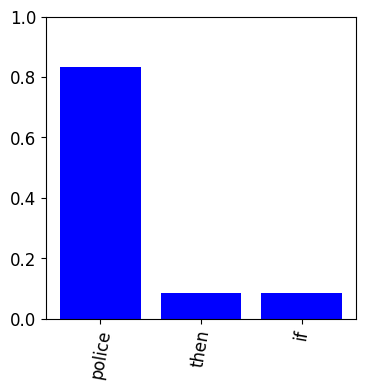

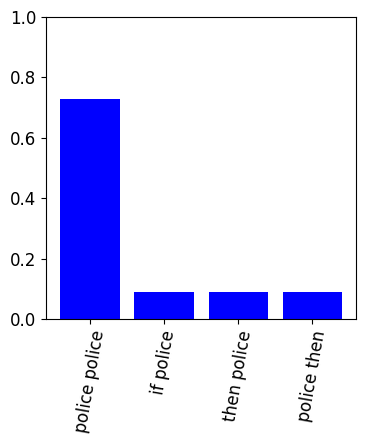

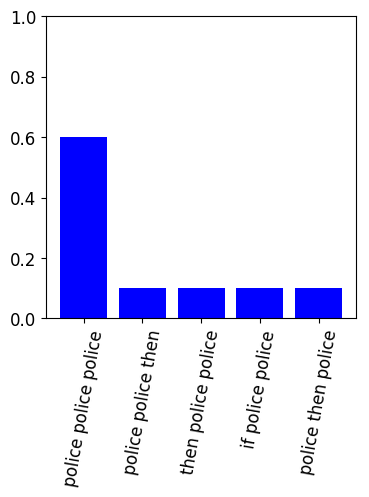

In [2]:
import matplotlib.pyplot as plt

print("N-gram frequencies for \"{}\"".format(" ".join(sentence2)))

def freq_conversion(ngram_multiset):
    total = sum(ngram_multiset.values())
    return {" ".join(key): val/total for key, val in ngram_multiset.items()}

def plotting_conversion(ngram_multiset):
    return list(zip(*sorted(ngram_multiset.items(), key=lambda x: x[1], reverse=True)))

unigrams = plotting_conversion(freq_conversion(ngram_multiset(sentence2, 1)))
bigrams = plotting_conversion(freq_conversion(ngram_multiset(sentence2, 2)))
trigrams = plotting_conversion(freq_conversion(ngram_multiset(sentence2, 3)))

for ngrams in [unigrams, bigrams, trigrams]:
    labels = ngrams[0]
    data = ngrams[1]
    plt.figure(figsize=(4,4), dpi=100)
    plt.bar(range(len(data)), data, color='b')
    plt.ylim((0,1))
    plt.xticks(range(len(data)), labels, rotation=80)
    plt.tick_params(axis='both', which='major', labelsize=12)
    # plt.text(str(label)+"-gram")
    plt.show()

Counts and frequency information can be used in various ways, for example for search engines.
One can measure the relevance of a text for a given search query based on how much of the text consists of the words in the search query.
In this case, it is particularly important to remove all stop words because they would otherwise obscure the relevance of keywords in a text.

<div class=example>
The sentence *Only John thinks John thinks John likes John* corresponds to the multiset
$S_M \is \setof{\text{only}: 1, \text{john}: 4, \text{thinks}: 2, \text{likes}: 1}$.
With frequencies instead of counts this is
$S_M \is \setof{\text{only}: 0.125, \text{john}: 0.5, \text{thinks}: 0.25, \text{likes}: 0.5}$.
So the relevance score to the query *john* would be $0.5$.
</div>

For practical purposes, both absolute counts and relative frequency can provide important information.
Absolute counts by themselves are not enough because a document that mentions *rules* 10 times might still not be a good match for "rules and representations" if the whole document contains 10,000 words.
On the other hand, a document containing just the phrase *rules schmules* would also be a horrible match despite 50% of it being mentions of *rules*.
There are many different strategies for optimising matches, and we will not go into details here.
However, it is instructive to see how queries consisting of multiple words can be handled mathematically.

## Multi-set Sums and Scalar Multiplication for Multi-Word Queries

Suppose a student has heard that the term *metaphysics* is somehow related to Aristotle and would like to learn more about that.
So they go to their search engine of choice and enter the search query *Aristotle metaphysics*.
How can the search engine provider make sure they will serve the user with a good list of matches?
Let us assume that the search engine already has absolute unigram, bigram, and trigram counts for each website.
The trigram counts won't matter since the query itself only consists of two words.
This leaves us with a choice between unigram and bigram counts.
But the search query wasn't meant as a bigram by the user, and very few texts contain the string *Aristotle metaphysics* although some might contain *Aristotle's metaphysics*.
A more promising route is to treat *Aristotle* and *metaphysics* as unigrams and find the website that has the highest combined number of tokens - this is surprisingly easy with multisets.

First, let us assume that the search engine is a large index of unigram multisets, each one of which encodes the unigram counts for a specific website.
Since we only care about the counts for *Aristotle* and *metaphysics*, we construct two new multisets that encode for each website how many tokens of *Aristotle* and *metaphysics* it contains.

<div class=example>
To keep the example simple we assume that our search engine has indexed only four websites, and in doing so has only kept counts for a few words.
The indices are represented as multisets below:

$$
$$\begin{array}{rl}
    w_1 & \is \setof{\text{Aristotle}: 9, \text{ethics}: 3, \text{metaphysics}: 0, \text{Plato}: 6, \text{Sokrates}: 0}\\
    w_2 & \is \setof{\text{Aristotle}: 1, \text{ethics}: 0, \text{metaphysics}: 9, \text{Plato}: 5, \text{Sokrates}: 0}\\
    w_3 & \is \setof{\text{Aristotle}: 4, \text{ethics}: 9, \text{metaphysics}: 5, \text{Plato}: 8, \text{Sokrates}: 2}\\
    w_4 & \is \setof{\text{Aristotle}: 0, \text{ethics}: 7, \text{metaphysics}: 3, \text{Plato}: 9, \text{Sokrates}: 0}\\
\end{array}$$
$$

From this we construct an *Aristotle* multiset $A_M$ and a *metaphysics* multiset $P_M$ (naming it $M_M$ would be too confusing).
$$
$$\begin{array}{rl}
    A_M & \is \setof{w_1: 9, w_2: 1, w_3: 4, w_4: 0}\\
    P_M & \is \setof{w_1: 0, w_2: 9, w_3: 5, w_4: 3}\\
\end{array}$$
$$
</div>

Let us make this conversion more explicit via functions.
Even though the idea is simple, the objects we work with are slightly more complex than anything we have seen before, so we will take our time to clearly build up the domain and co-domain of the function, as well as the actual mapping.

As said before, the search engine operates with an index, which is a set of multisets.
The multisets in the index keep track of unigram counts on websites.
Each unigram is a member of a fixed set $\Sigma$, so each multiset is a function from $\Sigma$ to $\mathbb{N}$.
We can thus view each multiset as a subset of the crossproduct $\Sigma \times \mathbb{N}$, and consequently the set of all multisets over $\Sigma$ is $\wp(\Sigma \times \mathbb{N})$.
Since the index is a set of multisets, it must be a set of members of $\wp(\Sigma \times \mathbb{N})$ and thus a subset thereof.
Therefore an index is a member of $\wp(\wp(\Sigma \times \mathbb{N}))$, which is the set of all indices of multisets over $\Sigma$.
Our conversion function takes an index as its only argument, so its domain is $\wp(\wp(\Sigma \times \mathbb{N}))$.

The co-domain is next.
The example above shows clearly that the output of the conversion is a multiset.
The elements of this multiset are no longer unigrams, but unique website identifiers (e.g. URLs).
Even though we interpret the multiset $A_M \is \setof{w_1: 9, w_2: 1, w_3: 4, w_4: 0}$ as keeping track of the number of *Aristotle* tokens in websites $w_1$, $w_2$, $w_3$, and $w_4$, this is just a specific interpretation we attach to this mathematical object.
The object itself is a multiset of website identifiers, so $w_1: 9$ just means that the multiset contains $w_1$ $9$ times.
This view of $A_M$ becomes more salient if we instead write the set as $\setof{w_1, w_1, w_1, w_1, w_1, w_1, w_1, w_1, w_1, w_2, w_3, w_3, w_3, w_3}$.
So even though we use $A_M$ to keep track of *Aristotle* counts, it is not a multiset of unigrams, it is a multiset of website identifiers (this is a nice real-world example of how one and the same object can be viewed and interpreted in many different ways).
Let $W$ be the set of all website identifiers.
Then a multiset over $W$ is a subset of $W \times \mathbb{N}$, and as a result the co-domain of the conversion function must be $\wp(W \times \mathbb{N})$.

Alright, we now know that these conversion functions have domain $\wp(\wp(\Sigma \times \mathbb{N}))$ and co-domain $\wp(W \times \mathbb{N})$, but we still need to define the actual mapping between the two.
This depends on the unigram $u$ that we want to construct the multiset for.
So for each unigram $u \in \Sigma$ we define a conversion function $c_u: \wp(\wp(\Sigma \times \mathbb{N})) \rightarrow \wp(W \times \mathbb{N})$.
In a slight abuse of notation, we also allow ourselves to write $I_w$ to refer to the multiset in index $I$ that corresponds to the website referred to by the website identifier $w \in W$.
Then for every index $I \subseteq \wp(\Sigma \times \mathbb{N})$, $c_u(I) \is \setof{ \tuple{w, n} \mid w \in W, I_w(u) = n }$.

Okay, we now have defined a function to formalize our intuitive model in mathematical terms with multisets.
It took quite a bit of effort, but fortunately our hard effort comes with a sweet payoff: now that we have a procedure that is guaranteed to produce multisets of the form we want, we can use familiar multiset operations on these outputs.

Recall that we started out with a student who entered the search query *Aristotle metaphysics* in an attempt to learn more about the connection between Aristotle and metaphysics.
At this point we now have two multisets over websites that tell us how well each website fits the individual terms *Aristotle* and *metaphysics*.
However, we still need to combine them into some kind of aggregate score.
But this is easily accomplished with multiset sum.

<div class=example>
Here are the multisets $A_M$ and $P_M$ that we computed before.
$$
$$\begin{array}{rl}
    A_M & \is \setof{w_1: 9, w_2: 1, w_3: 4, w_4: 0}\\
    P_M & \is \setof{w_1: 0, w_2: 9, w_3: 5, w_4: 3}\\
\end{array}$$
$$
Their multiset sum is
$$
\begin{align*}
    A_M \multisum P_M & = \setof{w_1: 9+0, w_2: 1+9, w_3: 4+5, w_4: 0+3}\\
                      & = \setof{w_1: 9, w_2: 10, w_3: 9, w_4: 3}\\
\end{align*}
$$
The best match according to this measure is the website $w_2$, closely followed by $w_1$ and $w_3$.
</div>

While multiset sum offers an easy way to convert the multisets produced according to the query into a single score for each website, it is also a bit too simplistic.
Multiset sum is *commutative*, which means that the order of arguments does not matter: $A_M + P_M = P_M + A_M$.
But the same arguably isn't true for the order of unigrams in a search query.
The fact that the student typed *Aristotle metaphysics* rather than *metaphysics Aristotle* suggests that *Aristotle* may be more important. 
In line with this interpretation we can use scalar multiplication to assign $A_M$ a greater weight relative to $P_M$.

<div class=example>
The values of $A_m$ and $P_M$ are listed here once more for the sake of easier reference:
$$
$$\begin{array}{rl}
    A_M & \is \setof{w_1: 9, w_2: 1, w_3: 4, w_4: 0}\\
    P_M & \is \setof{w_1: 0, w_2: 9, w_3: 5, w_4: 3}\\
\end{array}$$
$$
Suppose that $A_M$ should be about 50% more important than $P_M$.
We can express this by multiplying $A_M$ by $3$ and $P_M$ by $2$.
Since $\frac{3}{2} = 1.5$, this assigns $A_M$ a 50% higher weight than $P_M$ while keeping the domain of the multiset limited to $\mathbb{N}$.
$$
\begin{align*}
    3 \multimult A_M &= \setof{w_1: 3 \mult 9, w_2: 3 \mult 1, w_3: 3 \mult 4, w_4: 3 \mult 0}\\
                     &= \setof{w_1: 27, w_2: 3, w_3: 12, w_4: 0}\\
    2 \multimult P_M &= \setof{w_1: 2 \mult 0, w_2: 2 \mult 9, w_3: 2 \mult 5, w_4: 2 \mult 3}\\
                     &= \setof{w_1: 0, w_2: 18, w_3: 10, w_4: 6}\\
\end{align*}
$$
As before, we combine the two multisets via multiset sum.
$$
\begin{align*}
    3 \multimult A_M + 2 \multimult P_M &= \setof{w_1: 27 + 0, w_2: 3 + 18, w_3: 12 + 10, w_4: 0 + 6}\\
                                        &= \setof{w_1: 27, w_2: 21, w_3: 22, w_4: 6}\\
\end{align*}
$$
As you can see, $w_1$ is now the best match, followed by $w_3$ and $w_4$.
Considering that $w_1$ does not contain any mention of metaphysics, we actually ended up making things worse.
</div>

## Bounded Discontinuity with Skip $n$-Grams

The weighting and summing of multisets described above clearly does not too work well on its own, other tricks are needed.
Search engine designers can draw from a rich toolbox.
Google's original claim to fame, for example, was that its search engine paid close attention not just to the content of an individual website but also how many websites link to it and what the content of these websites looks like.
We will not talk much about such techniques because they are at best marginally related to linguistics and language technology.
But there is one simple extension to the approach above that is more closely related to ideas we have already encountered.

While we decided against interpreting the query *Aristotle metaphysics* as a bigram, we could nonetheless choose to reward websites where the unigrams *Aristotle* and *metaphysics* may not occur right next to each other, but still in close proximity.
This is the core idea underlying *skip grams*.
A skip bigram, for example, behaves like a bigram, except that it skips a fixed number of intervening unigrams.

<div class=example>
Suppose a website contains the sentence *Aristotle put metaphysics on the map*.
Its set of bigrams consists of *Aristotle put*, *put metaphysics*, *metaphysics on*, *on the*, and *the map*.
Clearly *Aristotle metaphysics* is not among those bigrams.
But now let us look at the set of $1$-skip bigrams: *Aristotle metaphysics*, *put on*, *metaphysics the*, *on map*.
As you can see, these are the bigrams of those words in the sentence that are separated by exactly one word.
The set of $2$-skip bigrams would contain *Aristotle on*, *put the*, and *metaphysics map*.
</div>

In [3]:
from pprint import pprint

def kskip_ngrams(string, k, n):
    if n < 1:
        return []
    offset = (n-1) * (k+1) + 1
    return [string[i:i+offset:k+1] for i in range(len(string) - offset + 1)]

example = "Aristotle put metaphysics on the map".split()
for k in range(1,6):
    pprint(kskip_ngrams(example, k, 2))

[['Aristotle', 'metaphysics'],
 ['put', 'on'],
 ['metaphysics', 'the'],
 ['on', 'map']]
[['Aristotle', 'on'], ['put', 'the'], ['metaphysics', 'map']]
[['Aristotle', 'the'], ['put', 'map']]
[['Aristotle', 'map']]
[]


<div class=definition>
Let $s \in \Sigma^*$ be a $\Sigma$-string.
Then $g \is u_1 \tuplecat \cdots \tuplecat u_n \in \Sigma^n$ is a *$k$-skip $n$-gram* of $s$ iff there are $v_1, \ldots, v_{n-1} \in \Sigma^k$ and $x,y \in \Sigma^*$ such that $s = x \tuplecat u_1 \tuplecat v_1 \tuplecat u_2 \tuplecat v_2 \tuplecat \cdots \tuplecat u_{n-1} \tuplecat v_{n-1} \tuplecat {u_n} \tuplecat y$.
</div>

This definition shows very clearly that we are once again dealing with a proper generalization of an established concept:
If $k=0$, then each $v_i$ must be the empty string $\emptystring$.
But remember that $\emptystring \tuplecat u_i = u_i \tuplecat \emptystring = u_i$ for every string $u_i$.
So $g$ is a $0$-skip $n$-gram of string $s$ iff there are $x,y \in \Sigma^*$ such that $s = x \tuplecat u_1 \tuplecat \emptystring \tuplecat u_2 \tuplecat \cdots \tuplecat u_{n-1} \tuplecat \emptystring \tuplecat u_n \tuplecat y = x \tuplecat u_1 \tuplecat u_2 \tuplecat \cdots \tuplecat u_{n-1} \tuplecat u_n \tuplecat y = x \tuplecat g \tuplecat y$.
But this holds iff $g$ is an $n$-gram of $s$.
So $0$-skip grams reduce to the familiar $n$-grams, showing that the latter are a special case of skip grams.

In [4]:
pprint(kskip_ngrams(example, 0, 2))

[['Aristotle', 'put'],
 ['put', 'metaphysics'],
 ['metaphysics', 'on'],
 ['on', 'the'],
 ['the', 'map']]


With $k$-skip $n$-grams, we can extract additional information from websites without increasing the size of $n$-grams.
For example, $1$-skip bigrams in combination with bigrams convey the same information as trigrams, but the storage cost is lower.
Given a fixed $\Sigma$ of size $n$, the set of all trigrams has cardinality $\card{\Sigma \times \Sigma \times \Sigma} = \card{\Sigma^3} = \card{\Sigma}^3 = n^3$.
Set set of all bigrams and all $1$-skip bigrams, on the other hand, each have cardinality $n^2$, so their combined storage cost is $2 n^2$.
For any $\Sigma$ with size $n > 2$, a multisets listing counts for all trigrams will be larger than two multisets listing counts for all bigrams and $1$-skip bigrams (ignoring the storage requirements for the actual counts, as the counts for bigrams will be larger than those for trigrams).

Skip grams extend the locality domain of $n$-grams models, an idea that we have already encountered with TSL grammars.
There the $\mathrm{del}_S$ function - originally designed to remove stop words from texts - is used to remove irrelevant sounds from words so that $n$-grams can be used to enforce dependencies between sounds that may be very far away from each other.
But we can also view TSL grammars as a skip gram model where the size of the skip isn't fixed in advance and instead shrinks and grows depending on the intervening material.
Sometimes we skip 20 components of the string, and sometimes none at all.
Each approach has its own advantages, and it seems that skip grams may be well-suited to NLP tasks whereas TSL is a better fit for modelling natural language.